# Disney Wait Times Analysis with respect to weather

## Importing and testing 

In [1]:
import pandas as pd

weather = pd.read_csv('./data/weather_data.csv')
wait_times = pd.read_csv('./data/waiting_times.csv')

In [2]:
print(wait_times.head())
wait_times.describe

    WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0  2018-01-01  2018-01-01 21:00:00.000             21   
1  2018-01-01  2018-01-01 19:30:00.000             19   
2  2018-01-01  2018-01-01 22:30:00.000             22   
3  2018-01-01  2018-01-01 12:45:00.000             12   
4  2018-01-01  2018-01-01 17:00:00.000             17   

                  FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  \
0  2018-01-01 21:15:00.000           Roller Coaster              0       2.0   
1  2018-01-01 19:45:00.000              Bumper Cars              5      18.0   
2  2018-01-01 22:45:00.000              Rapids Ride              0       1.0   
3  2018-01-01 13:00:00.000              Crazy Dance              5       1.0   
4  2018-01-01 17:15:00.000                   Skyway              5      15.0   

   GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  UP_TIME  DOWNTIME  \
0            0.0     0.000             0.00          0        0         0   
1          148.0   254

<bound method NDFrame.describe of           WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0        2018-01-01  2018-01-01 21:00:00.000             21   
1        2018-01-01  2018-01-01 19:30:00.000             19   
2        2018-01-01  2018-01-01 22:30:00.000             22   
3        2018-01-01  2018-01-01 12:45:00.000             12   
4        2018-01-01  2018-01-01 17:00:00.000             17   
...             ...                      ...            ...   
3509319  2022-08-18  2022-08-18 18:45:00.000             18   
3509320  2022-08-18  2022-08-18 10:15:00.000             10   
3509321  2022-08-18  2022-08-18 09:15:00.000              9   
3509322  2022-08-18  2022-08-18 20:30:00.000             20   
3509323  2022-08-18  2022-08-18 10:45:00.000             10   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
0        2018-01-01 21:15:00.000           Roller Coaster              0   
1        2018-01-01 19:45:00.000              Bumper Cars

In [3]:
print(weather.head())
weather.describe

          dt                         dt_iso  timezone        city_name  \
0  915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1  915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2  915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3  915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4  915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   

         lat       lon  temp  visibility  dew_point  feels_like  ...  \
0  48.873492  2.295104  8.33         NaN       3.39        5.28  ...   
1  48.873492  2.295104  8.08         NaN       3.54        5.18  ...   
2  48.873492  2.295104  8.08         NaN       4.11        5.38  ...   
3  48.873492  2.295104  7.31         NaN       3.73        4.42  ...   
4  48.873492  2.295104  6.91         NaN       3.53        4.00  ...   

   wind_gust  rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0        NaN      NaN      NaN      NaN      N

<bound method NDFrame.describe of                 dt                         dt_iso  timezone        city_name  \
0        915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1        915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2        915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3        915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4        915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   
...            ...                            ...       ...              ...   
207259  1661281200  2022-08-23 19:00:00 +0000 UTC      7200  Custom location   
207260  1661284800  2022-08-23 20:00:00 +0000 UTC      7200  Custom location   
207261  1661288400  2022-08-23 21:00:00 +0000 UTC      7200  Custom location   
207262  1661292000  2022-08-23 22:00:00 +0000 UTC      7200  Custom location   
207263  1661295600  2022-08-23 23:00:00 +0000 UTC      7200  Custom location   

     

## Creating two new df's from weather and wait_times for merging

In [4]:
wait_times_new = wait_times.copy()
wait_times_new = wait_times_new.dropna(subset=['CAPACITY', 'WAIT_TIME_MAX'], how='any')
wait_times_new['DateTime'] = pd.to_datetime(wait_times_new['DEB_TIME'])
wait_times_new['year'] = wait_times_new['DateTime'].dt.year
wait_times_new['hour'] = wait_times_new['DateTime'].dt.hour

wait_times_new_roller = wait_times_new[(wait_times_new['CAPACITY'] != 0) & (wait_times_new['ENTITY_DESCRIPTION_SHORT'] == "Roller Coaster")]
wait_times_new_rapids = wait_times_new[(wait_times_new['CAPACITY'] != 0) & (wait_times_new['ENTITY_DESCRIPTION_SHORT'] == "Rapids Ride")]

wait_times_new_roller = wait_times_new_roller[['year', 'hour', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'GUEST_CARRIED']]
wait_times_new_rapids = wait_times_new_rapids[['year', 'hour', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'GUEST_CARRIED']]

print(wait_times_new_roller)
print(wait_times_new_rapids)

         year  hour ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  GUEST_CARRIED
7        2018    15           Roller Coaster             20           51.0
57       2018    11           Roller Coaster             50           54.0
92       2018    17           Roller Coaster             20           29.0
121      2018    11           Roller Coaster             50           42.0
125      2018    12           Roller Coaster             35           52.0
...       ...   ...                      ...            ...            ...
3508969  2022    10           Roller Coaster             40            7.0
3509075  2022    13           Roller Coaster             60            7.0
3509110  2022    17           Roller Coaster              0            0.0
3509127  2022    11           Roller Coaster             40           11.0
3509273  2022    13           Roller Coaster             45           16.0

[44774 rows x 5 columns]
         year  hour ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  GUEST_CARRIED

In [5]:
weather_new = weather.copy()
weather_new = weather_new.dropna(subset=['dt', 'temp'], how='any')
weather_new['DateTime'] = pd.to_datetime(weather_new['dt'], unit='s')
weather_new['year'] = weather_new['DateTime'].dt.year
weather_new['hour'] = weather_new['DateTime'].dt.hour
weather_new = weather_new[['year', 'hour', 'temp', 'dew_point', 'feels_like']]
weather_new = weather_new[weather_new['year'] >= 2018]

weather_new



,year,hour,temp,dew_point,feels_like
166560,2018,0,8.94,4.56,5.21
166561,2018,1,8.07,3.72,4.09
166562,2018,2,7.76,3.42,3.81
166563,2018,3,7.57,3.43,3.63
166564,2018,4,6.86,3.30,2.88
...,...,...,...,...,...
207259,2022,19,24.89,18.34,25.18
207260,2022,20,23.06,18.18,23.35
207261,2022,21,21.83,18.42,22.18
207262,2022,22,21.08,18.46,21.46


### Merging

In [6]:
matching_roller = pd.merge(wait_times_new_roller, weather_new, on=['year', 'hour'])
matching_rapids = pd.merge(wait_times_new_rapids, weather_new, on=['year', 'hour'])
print(wait_times_new_rapids.columns)

Index(['year', 'hour', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX',
       'GUEST_CARRIED'],
      dtype='object')


## Plotting wait times from Roller Coaster compared to weather(feels like)

Text(0.5, 1.0, 'Guests Carried vs Feels Like Temperature')

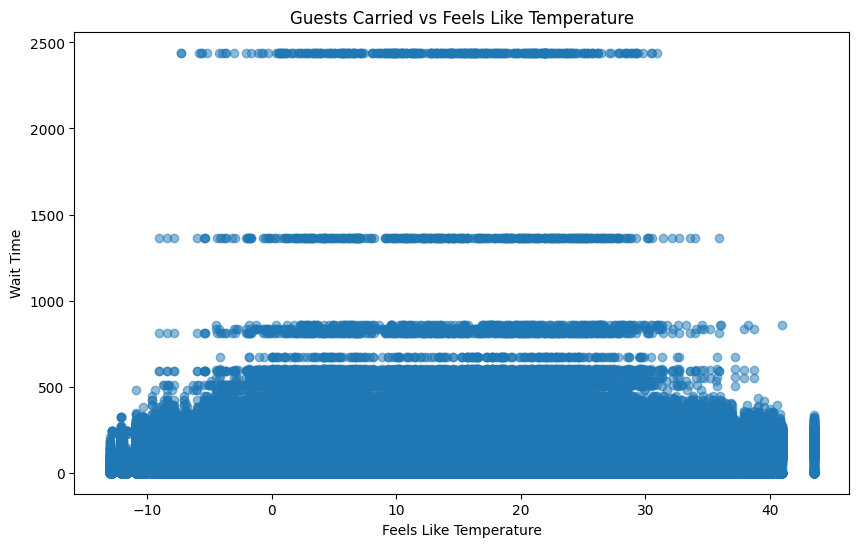

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10,6))
plt.scatter(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'], alpha=0.5)
plt.xlabel('Feels Like Temperature')
plt.ylabel('Wait Time')
plt.title('Guests Carried vs Feels Like Temperature')


### Doesn't seem to be any clear correlation from data on whether weather affects wait times

## Testing Hypothesis using Pearsons Correlation 

In [8]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.030310253889163023, p-value: 0.0


### Low correlation value confirms the hyopthesis from the graph. But since the dataset is so large, the p-value could be forced lower. Even .03 could be signifcant if we have millions of rows.

## Graphing using boxes

<function matplotlib.pyplot.show(close=None, block=None)>

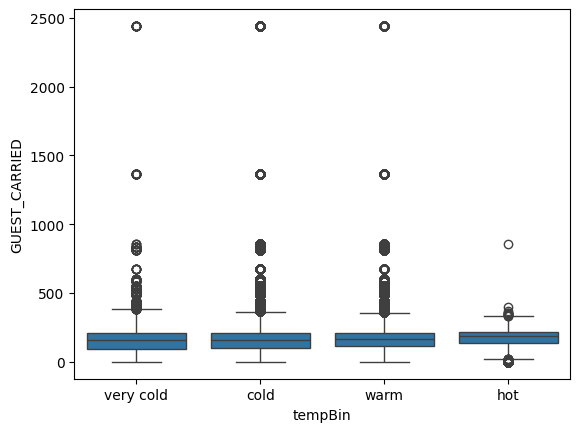

In [9]:
import seaborn as sns
matching_rapids['tempBin'] = pd.cut(matching_rapids['feels_like'], bins=[-20, 0, 20, 40, 60], labels=['very cold', 'cold', 'warm', 'hot'])
sns.boxplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids)
plt.show

## Using ANOVA

In [10]:
from scipy.stats import f_oneway
very_cold = matching_rapids[matching_rapids['tempBin'] == 'very cold']['GUEST_CARRIED']
cold = matching_rapids[matching_rapids['tempBin'] == 'cold']['GUEST_CARRIED']
warm = matching_rapids[matching_rapids['tempBin'] == 'warm']['GUEST_CARRIED']
hot = matching_rapids[matching_rapids['tempBin'] == 'hot']['GUEST_CARRIED']

stat, p = f_oneway(very_cold, cold, warm, hot)
print(f"ANOVA p-value: {p}")

ANOVA p-value: 0.0


### This ANOVA calculation of 0 (or extremely close to 0) states that the mean values of some box is different from the rest. The variance of the boxes differ significantly. 

In [11]:
print(matching_rapids.groupby('tempBin', observed=True)['GUEST_CARRIED'].mean())

tempBin
very cold    148.807080
cold         150.092853
warm         155.309478
hot          173.720239
Name: GUEST_CARRIED, dtype: float64


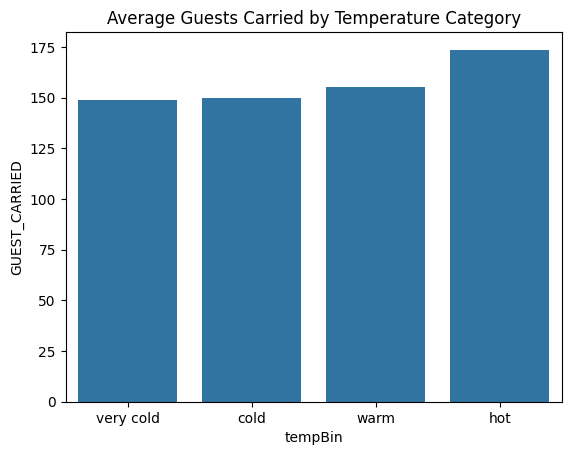

In [12]:
sns.barplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids, errorbar=None)
plt.title('Average Guests Carried by Temperature Category')
plt.show()